In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Myriad Pro'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import numpy as np 
import xarray as xr
from utilities import * 
from ipcc_cmaps import *

42


Text(0.5, 1.0, 'Daily temperature time series over 1900-2015')

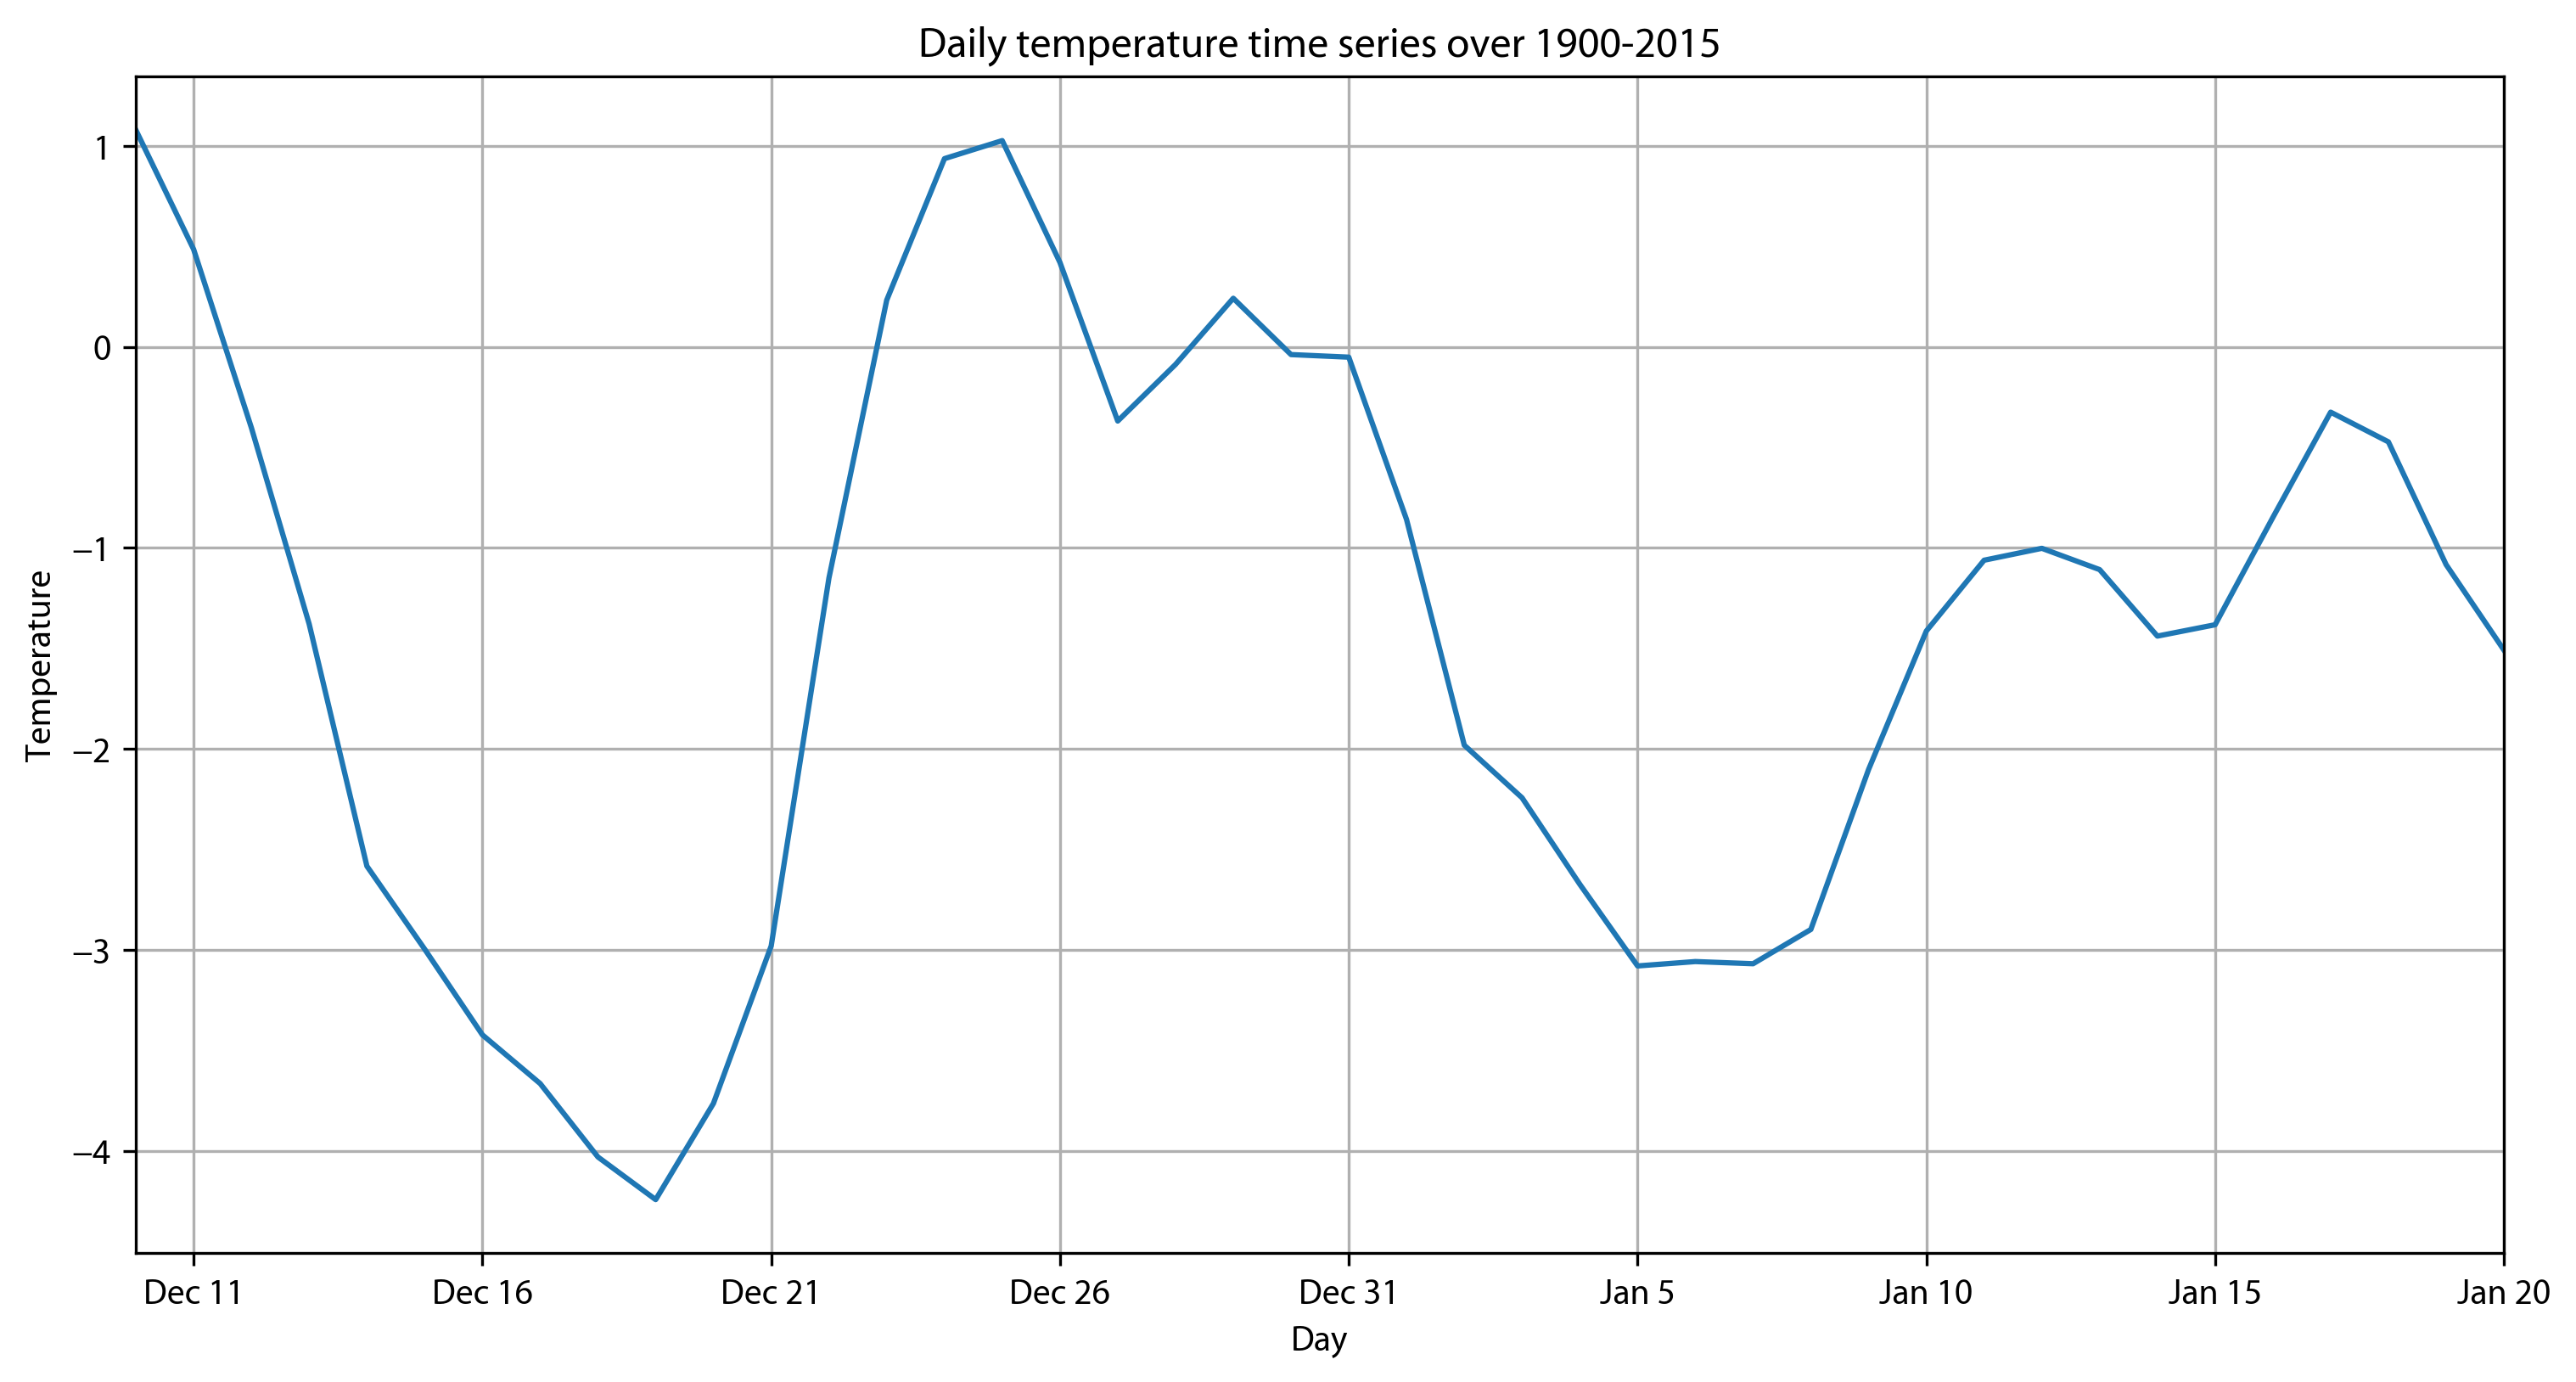

In [5]:
Tmax = np.loadtxt('data/EU_temp.txt')

# compute the 1981-2010 climatology of Tmax
ref_ = np.mean(Tmax[81:110, :])
Tmax -= ref_

Tmax_f = Tmax.flatten()

# selecte 2009 Dec 10 to 2010 Jan 20 
slice_ = list(range(365*110 - 22, 365*110 + 20))
print(len(slice_))
# plot the daily temperature time series over 1900-2015 as stored in yyf
# change figure size to [10, 6]
plt.figure(figsize=[12, 6])
plt.plot(Tmax_f[slice_])
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.xticks(np.arange(1, 42, 5), ['Dec 11', 'Dec 16', 'Dec 21', 'Dec 26', 'Dec 31', 'Jan 5', 'Jan 10', 'Jan 15', 'Jan 20'])
plt.xlim([0, 41])
plt.grid()
plt.title('Daily temperature time series over 1900-2015')


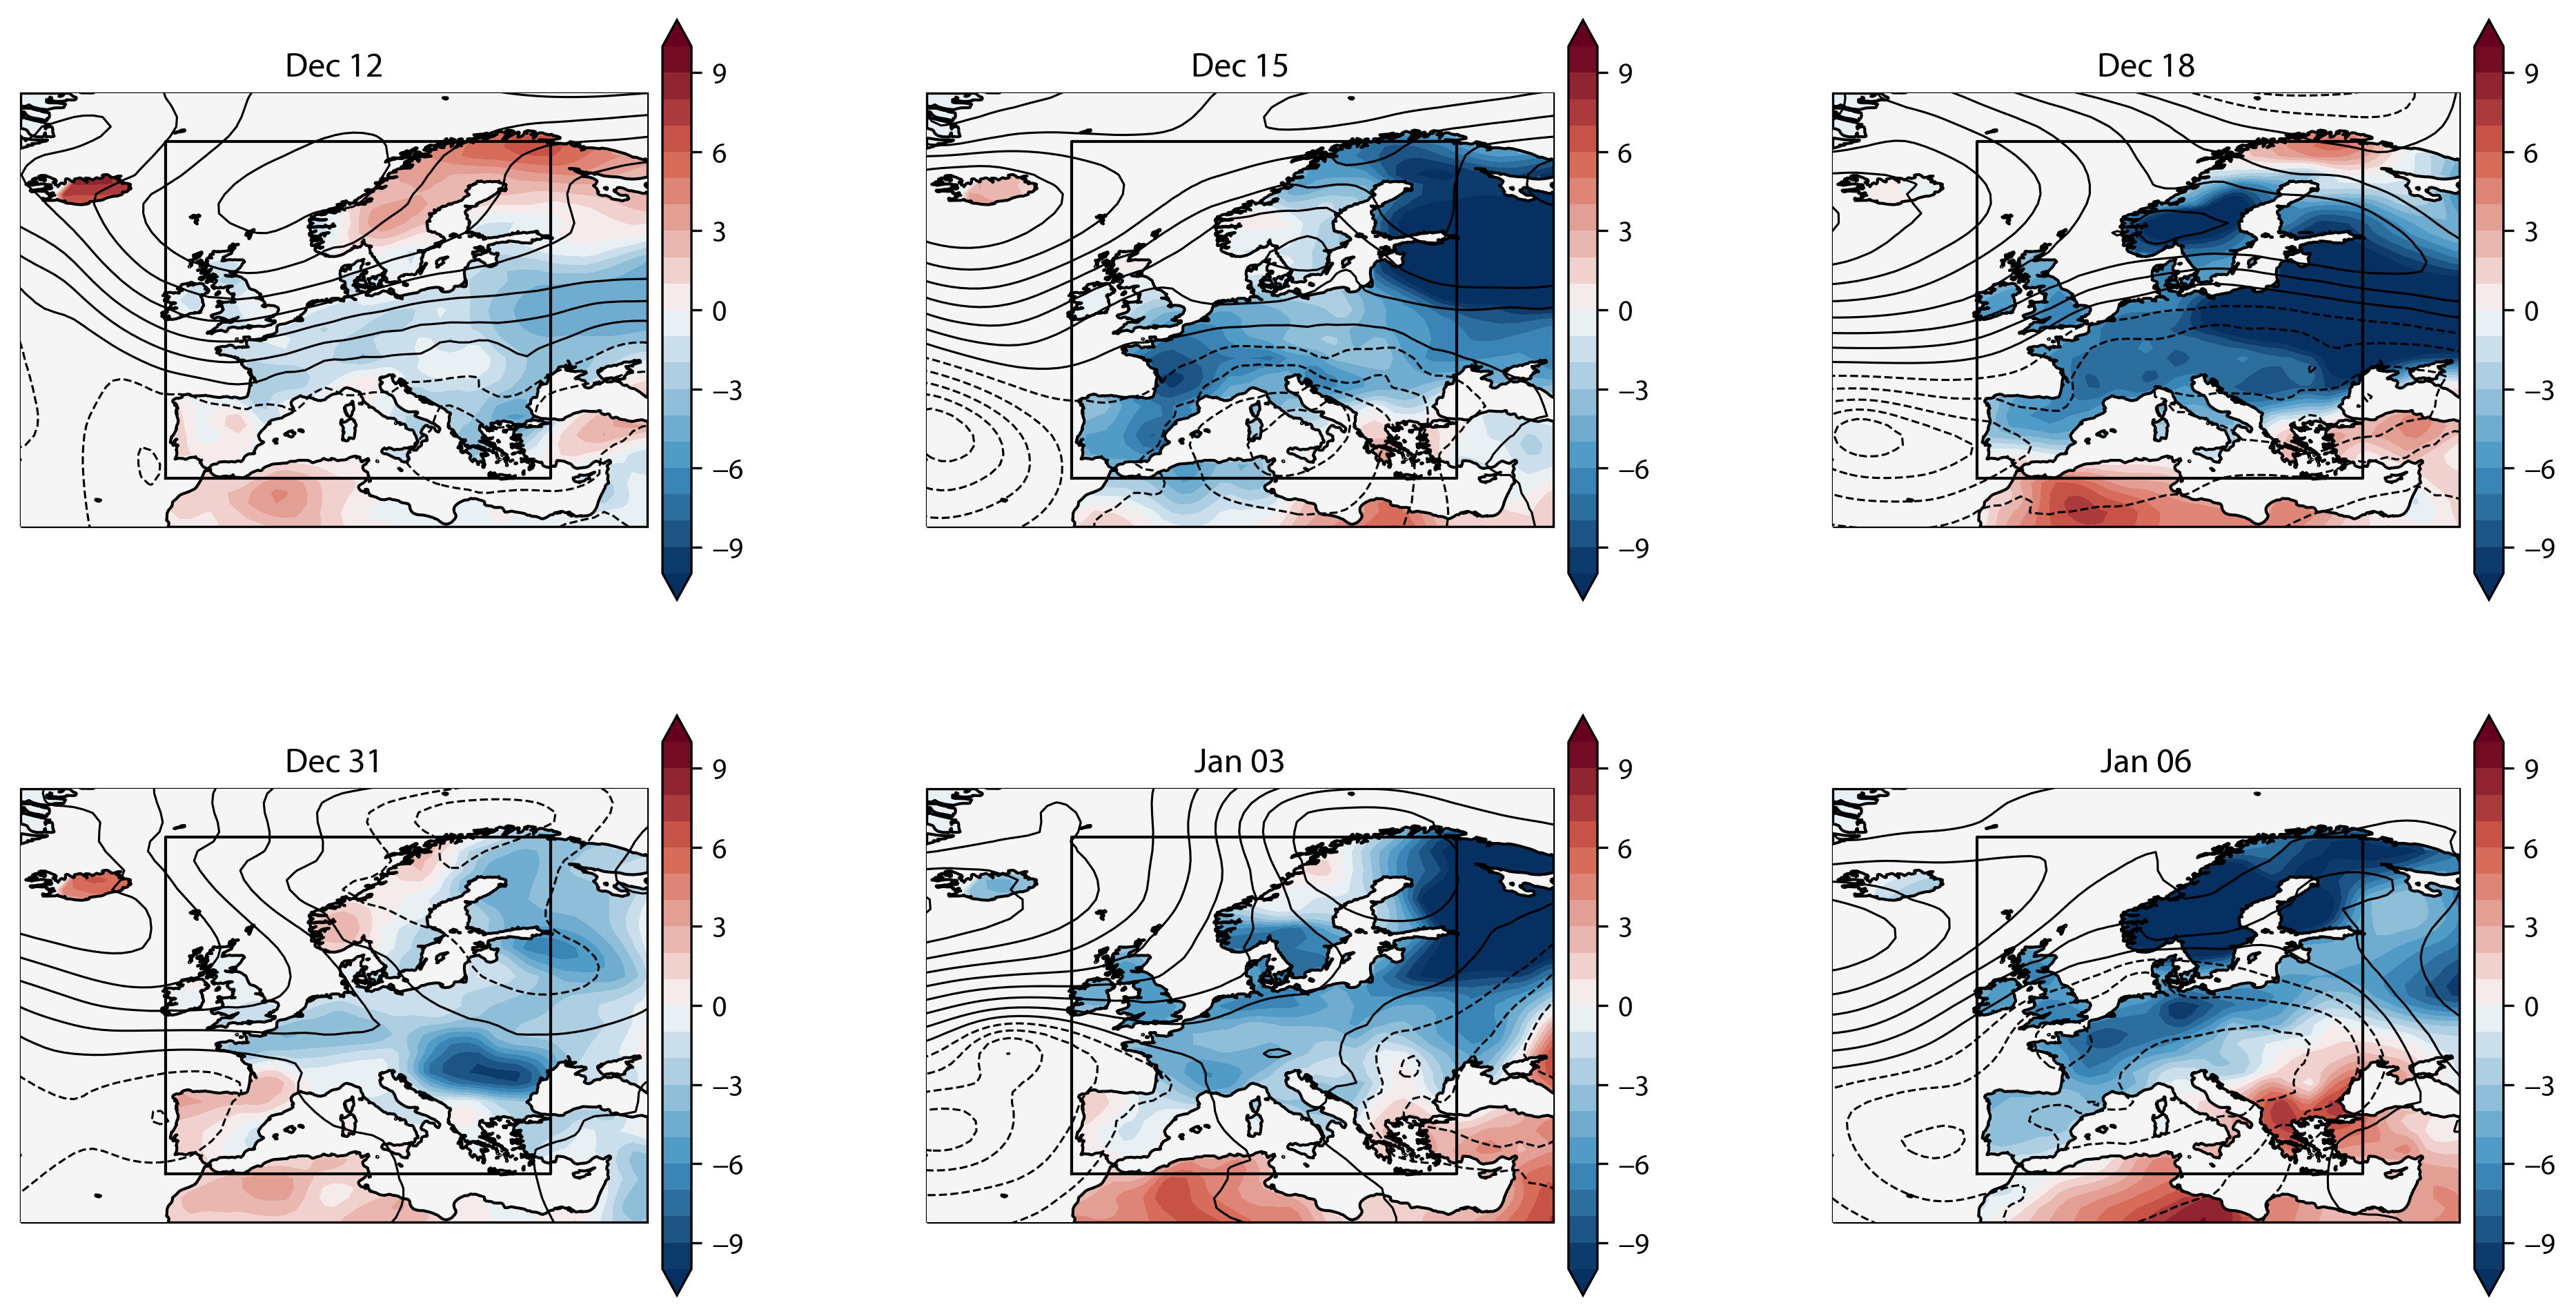

In [14]:
yy = [i - 1900 for i in [2009, 2009, 2009, 2010, 2010, 2010]]
cur = 365 - 22
dd = [cur + 2, cur + 5, cur + 8, cur + 21, 2, 5]
date = ['Dec 12', 'Dec 15', 'Dec 18', 'Dec 31', 'Jan 03', 'Jan 06']

with xr.open_dataset('data/temp_anom.nc') as ds:
    temp_anom = ds['temp_anom'].values
with xr.open_dataset('data/slp_anom.nc') as ds:
    slp_anom = ds['slp_anom'].values
pause = 1

# for plotting
lats_mesh = np.linspace(25.5, 90.5, 65, endpoint=False) # 25N - 90N
lons_mesh = np.linspace(-59.5, 100.5, 160, endpoint=False) # 60W - 100E
extent = [-25, 40, 30, 75]
cmap = get_ipcc_cmap('temp_div')

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=[16, 8], subplot_kw={'projection': ccrs.PlateCarree()})
for i in range(6):
    ridx, cidx = i//3, i%3
    plot_shading_map(ax[ridx, cidx], temp_anom[yy[i], dd[i], :, :], lons_mesh, lats_mesh, extent, cmap, vmin=-10, vmax=10)
    plot_contour_map(ax[ridx, cidx], slp_anom[yy[i], dd[i], :, :], lons_mesh, lats_mesh, extent)
    ax[ridx, cidx].set_title(date[i])
    